In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC

In [14]:
model=SVC()

In [15]:
model.fit(X_train,y_train)

SVC()

In [16]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7402597402597403


In [19]:
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Confusion matrix: [[84 11]
 [29 30]]


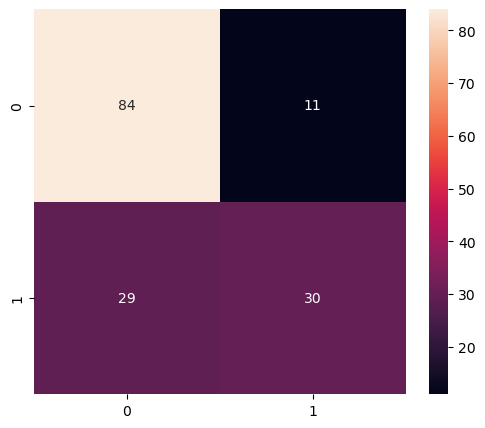

In [20]:
cnf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cnf,annot=True)
plt.show()

# hyperparameter tunning

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
svm_model= SVC()

In [23]:
svm_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [24]:
classfier=GridSearchCV(estimator=svm_model,param_grid=svm_grid,cv=5)

In [25]:
classfier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [26]:
classfier.cv_results_

{'mean_fit_time': array([0.01884127, 0.02680116, 0.0218636 , 0.01457968, 0.01587787,
        0.02507133, 0.01960211, 0.01937633, 0.06839786, 0.03392768,
        0.07092466, 0.01942234, 0.06560931, 0.01446338, 0.05936065,
        0.02247357, 0.50555129, 0.03057742, 0.6440207 , 0.06001239,
        0.50904627, 0.02563329, 0.50698128, 0.01874604, 4.59599891,
        0.03194933, 4.75238991, 0.12093787, 4.71328707, 0.02747288,
        4.62717648, 0.02237401]),
 'std_fit_time': array([8.94949801e-03, 8.72912924e-03, 7.65764597e-03, 2.12899613e-03,
        4.77322679e-04, 7.68834987e-03, 6.99570182e-03, 3.06584733e-03,
        1.14686549e-02, 2.70039899e-03, 1.66622670e-02, 6.61876348e-03,
        1.16904364e-02, 4.16800482e-03, 6.24771119e-03, 6.37516954e-03,
        8.72992914e-02, 2.87870919e-03, 1.71521664e-01, 1.20709877e-02,
        9.20803836e-02, 6.89405238e-03, 8.48567364e-02, 6.24923712e-03,
        1.57406551e+00, 8.93010624e-04, 1.51261798e+00, 1.72947743e-02,
        1.66288466e+0

In [27]:
classfier.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [29]:
tunning=SVC(C=1000,gamma=0.0001,kernel='rbf')

In [30]:
tunning.fit(X_train,y_train)

SVC(C=1000, gamma=0.0001)

In [31]:
y_pred=tunning.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [32]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7597402597402597
